In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# グループデータ分析

## データの理解

In [45]:
raw_df = pd.read_csv('train.csv')
raw_df.shape

(103904, 25)

In [27]:
raw_df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [28]:
raw_df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [11]:
df_sample = df.sample(n=10000, random_state=12)

In [29]:
raw_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [46]:
df = raw_df.copy()

In [47]:
#性別をMale:0、Female:1に変換
df.loc[df.query('Gender == "Male"').index, 'Gender'] = 0
df.loc[df.query('Gender == "Female"').index, 'Gender'] = 1
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,0,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,1,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,1,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,0,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,1,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,0,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,0,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,1,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [63]:
#Unnamedの列を消去
df = df.drop('Unnamed: 0',axis=1)

In [64]:
#CustomerTypeのLoyalCustomer:0、disloyalCustomer:1に変換
df.loc[df.query('`Customer Type` == "Loyal Customer"').index, 'Customer Type'] = 0
df.loc[df.query('`Customer Type` == "disloyal Customer"').index, 'Customer Type'] = 1
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,0,13,0,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,0,1,25,1,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,1,0,26,1,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,1,0,25,1,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,0,0,61,1,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,1,23,1,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,0,0,49,1,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,0,1,30,1,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,1,1,22,1,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [65]:
#TypeofTravelのPersonalTravel:0、Businesstravel:1に変換
df.loc[df.query('`Type of Travel` == "Personal Travel"').index, 'Type of Travel'] = 0
df.loc[df.query('`Type of Travel` == "Business travel"').index, 'Type of Travel'] = 1
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,0,13,0,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,0,1,25,1,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,1,0,26,1,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,1,0,25,1,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,0,0,61,1,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,1,23,1,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,0,0,49,1,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,0,1,30,1,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,1,1,22,1,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [72]:
df_sample = df.sample(n=1000, random_state=12)
df_sample

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
88501,77145,1,0,39,1,Business,1865,1,1,1,...,5,5,5,5,5,5,4,0,0.0,satisfied
68499,72284,0,0,25,0,Eco,919,2,5,2,...,2,5,4,5,5,5,2,1,0.0,neutral or dissatisfied
8269,116962,0,0,56,1,Business,3467,4,4,4,...,2,2,2,2,4,2,3,37,17.0,satisfied
8286,72684,0,0,68,0,Eco,1121,1,4,1,...,4,4,3,3,5,4,4,0,0.0,neutral or dissatisfied
58857,90810,0,1,59,1,Business,271,1,1,1,...,1,1,5,4,3,4,1,0,8.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39316,66960,1,0,40,1,Business,2139,4,4,4,...,4,4,4,4,5,4,3,0,0.0,satisfied
38912,101383,0,0,44,1,Business,3411,4,4,4,...,5,5,5,5,3,5,3,0,0.0,satisfied
31440,47644,0,0,29,1,Business,1211,2,2,2,...,2,2,3,4,1,4,2,27,23.0,neutral or dissatisfied
48099,3837,1,0,16,0,Eco,710,2,4,2,...,1,5,5,4,3,5,1,14,21.0,neutral or dissatisfied


### Gender：性別

satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,0.572629,0.427371
Male,0.560525,0.439475
All,0.566667,0.433333


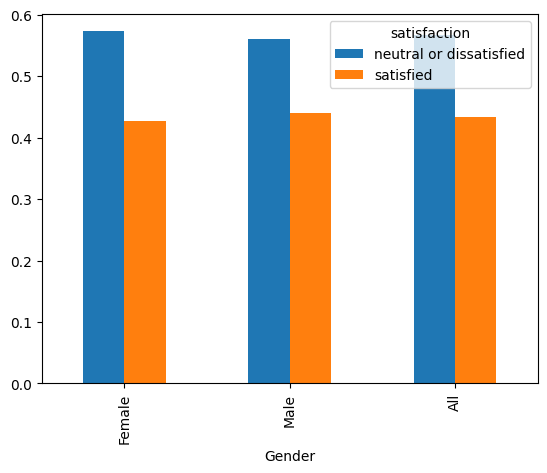

In [85]:
#Gender
cross = pd.crosstab(raw_df['Gender'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Customer Type：顧客タイプ(Loyal：誠実な顧客 ,disloyal：不誠実な顧客)

satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,0.522709,0.477291
disloyal Customer,0.763342,0.236658
All,0.566667,0.433333


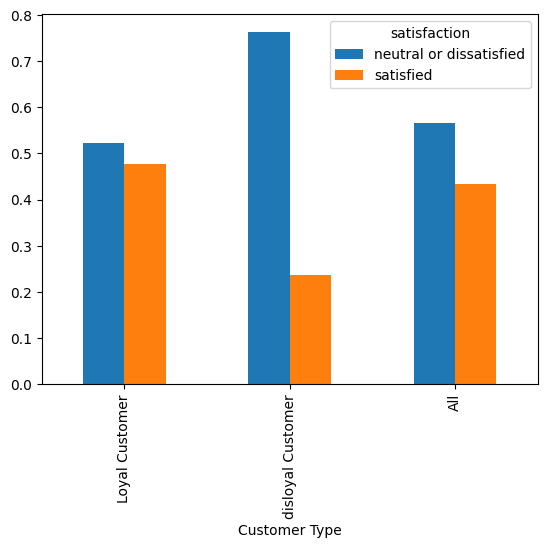

In [79]:
#Customer Type
cross = pd.crosstab(raw_df['Customer Type'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Age：年齢

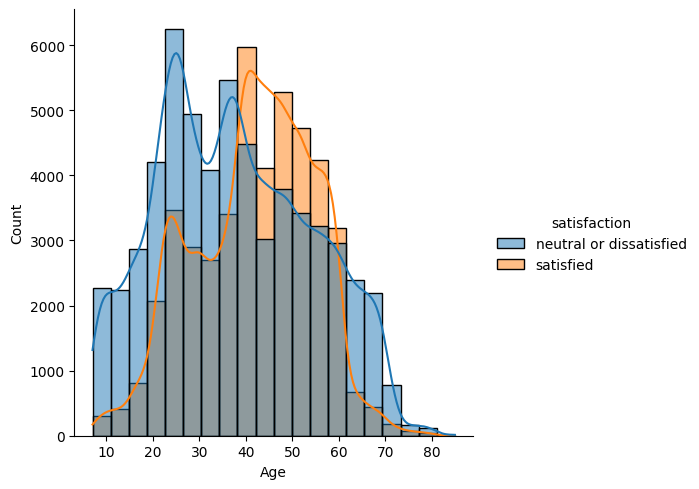

In [87]:
#Age
sns.displot(data=raw_df, x="Age", hue="satisfaction", kde=True, bins=20)
plt.show()

### Type of Travel：旅行の種類(Business：出張 ,Personal：個人旅行)

satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,0.417403,0.582597
Personal Travel,0.898322,0.101678
All,0.566667,0.433333


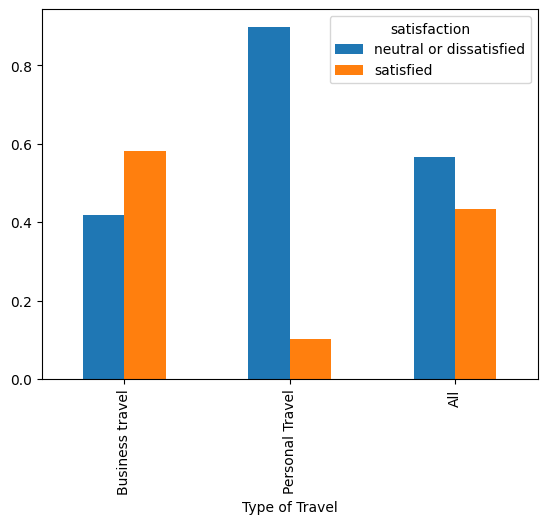

In [81]:
#Type of Travel
cross = pd.crosstab(raw_df['Type of Travel'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Class：旅行クラス(Business：ビジネス, Eco：エコノミー, Eco Plus：エコノミー＋)

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,0.305749,0.694251
Eco,0.813862,0.186138
Eco Plus,0.753936,0.246064
All,0.566667,0.433333


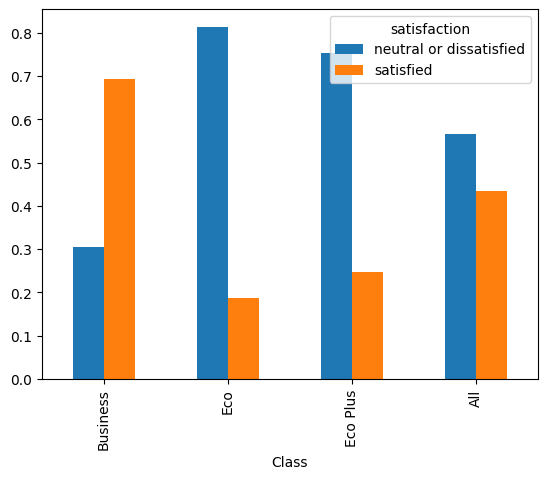

In [82]:
#Class
cross = pd.crosstab(raw_df['Class'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Flight Distance：飛行距離

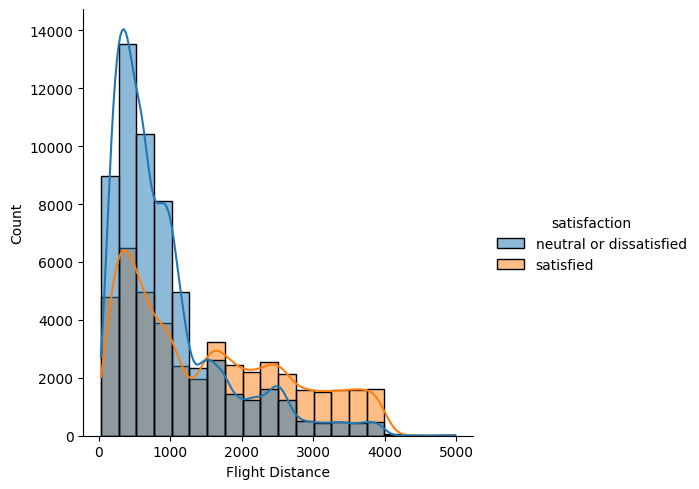

In [84]:
#Flight Distance
sns.displot(data=raw_df, x="Flight Distance", hue="satisfaction", kde=True, bins=20)
plt.show()

### Inflight wifi service：機内Wi-Fiサービス

satisfaction,neutral or dissatisfied,satisfied
Inflight wifi service,,
0,0.002578,0.997422
1,0.674552,0.325448
2,0.751336,0.248664
3,0.749420,0.250580
4,0.401031,0.598969
5,0.009242,0.990758
All,0.566667,0.433333


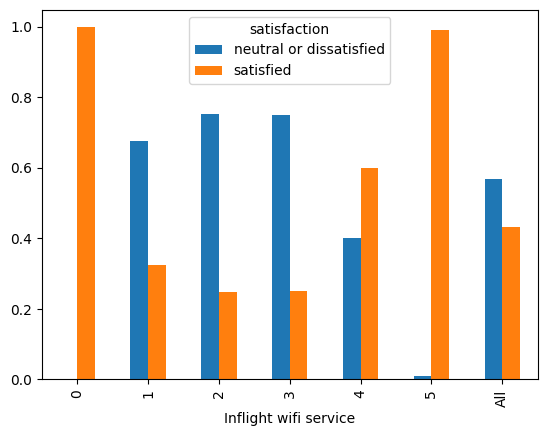

In [91]:
#Inflight wifi service
cross = pd.crosstab(raw_df['Inflight wifi service'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Departure/Arrival time convenient：便利な出発/到着時間

satisfaction,neutral or dissatisfied,satisfied
Departure/Arrival time convenient,,
0,0.524528,0.475472
1,0.513421,0.486579
2,0.554593,0.445407
3,0.561783,0.438217
4,0.612229,0.387771
5,0.574700,0.425300
All,0.566667,0.433333


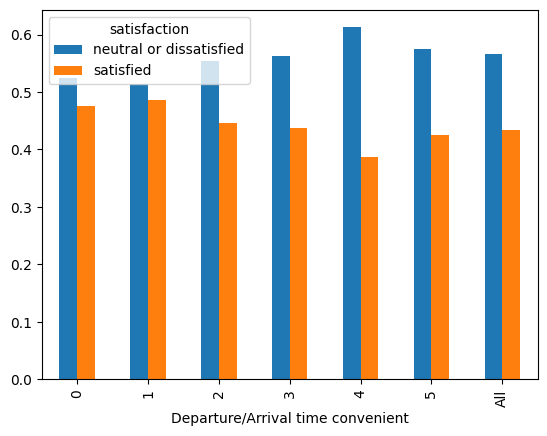

In [93]:
#Departure/Arrival time convenient
cross = pd.crosstab(raw_df['Departure/Arrival time convenient'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Ease of Online bookng：オンライン予約のしやすさ

satisfaction,neutral or dissatisfied,satisfied
Ease of Online booking,,
0,0.335859,0.664141
1,0.623966,0.376034
2,0.696058,0.303942
3,0.691726,0.308274
4,0.469061,0.530939
5,0.261714,0.738286
All,0.566667,0.433333


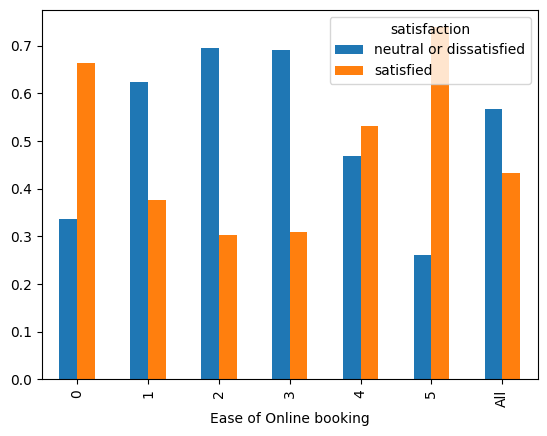

In [120]:
#Ease of Online booking
cross = pd.crosstab(raw_df['Ease of Online booking'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Gate location：ゲートの場所

satisfaction,neutral or dissatisfied,satisfied
Gate location,,
0,0.000000,1.000000
1,0.504441,0.495559
2,0.539288,0.460712
3,0.652798,0.347202
4,0.611480,0.388520
5,0.427624,0.572376
All,0.566667,0.433333


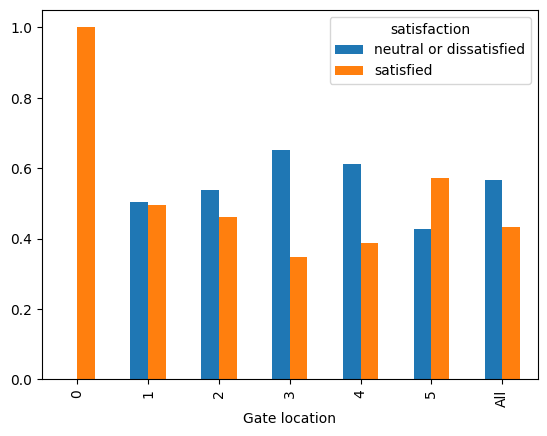

In [95]:
#Gate location
cross = pd.crosstab(raw_df['Gate location'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Food and drink：食べ物と飲み物

satisfaction,neutral or dissatisfied,satisfied
Food and drink,,
0,0.532710,0.467290
1,0.799953,0.200047
2,0.612061,0.387939
3,0.603632,0.396368
4,0.475019,0.524981
5,0.450993,0.549007
All,0.566667,0.433333


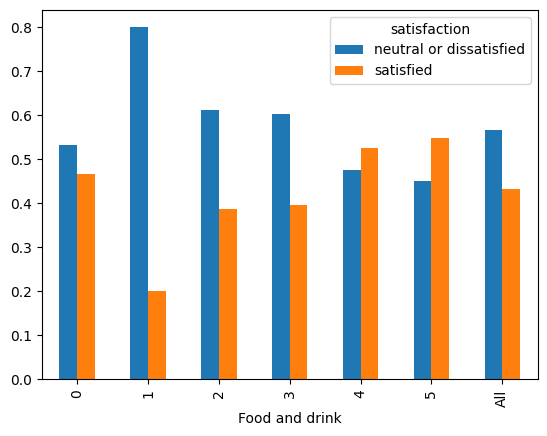

In [96]:
#Food and drink
cross = pd.crosstab(raw_df['Food and drink'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Online boarding：オンライン搭乗

satisfaction,neutral or dissatisfied,satisfied
Online boarding,,
0,0.443575,0.556425
1,0.862233,0.137767
2,0.884662,0.115338
3,0.864291,0.135709
4,0.376959,0.623041
5,0.128229,0.871771
All,0.566667,0.433333


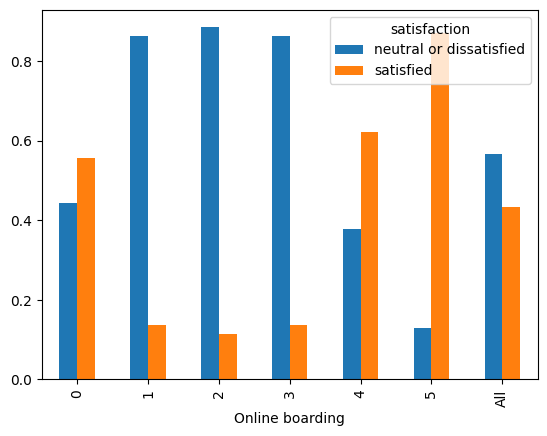

In [97]:
#Online boarding
cross = pd.crosstab(raw_df['Online boarding'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Seat comfort：シートの快適性

satisfaction,neutral or dissatisfied,satisfied
Seat comfort,,
0,1.000000,0.000000
1,0.776812,0.223188
2,0.775861,0.224139
3,0.788457,0.211543
4,0.438848,0.561152
5,0.349792,0.650208
All,0.566667,0.433333


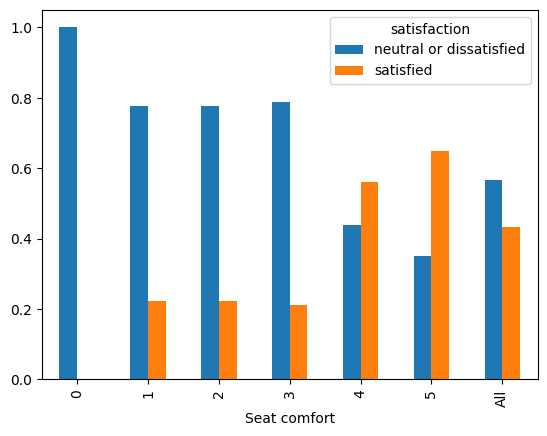

In [98]:
#Seat comfort
cross = pd.crosstab(raw_df['Seat comfort'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Inflight entertainment：機内エンターテイメント

satisfaction,neutral or dissatisfied,satisfied
Inflight entertainment,,
0,1.000000,0.000000
1,0.860154,0.139846
2,0.786698,0.213302
3,0.729923,0.270077
4,0.388234,0.611766
5,0.351565,0.648435
All,0.566667,0.433333


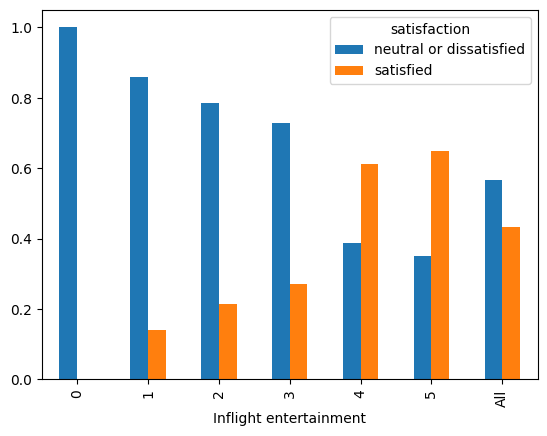

In [99]:
#Inflight entertainment
cross = pd.crosstab(raw_df['Inflight entertainment'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### On-board service：オンボードサービス

satisfaction,neutral or dissatisfied,satisfied
On-board service,,
0,1.000000,0.000000
1,0.806267,0.193733
2,0.744295,0.255705
3,0.684317,0.315683
4,0.463148,0.536852
5,0.357578,0.642422
All,0.566667,0.433333


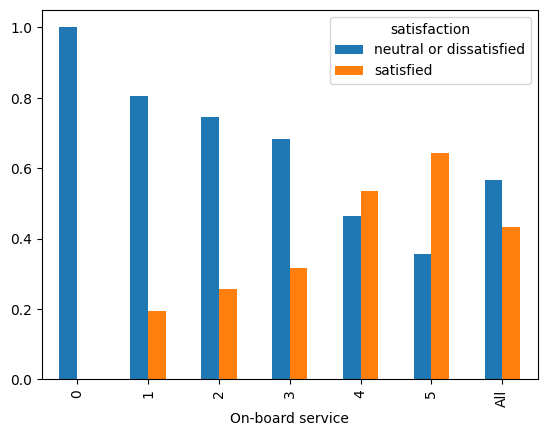

In [100]:
#On-board service
cross = pd.crosstab(raw_df['On-board service'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Leg room service：レッグルームサービス

satisfaction,neutral or dissatisfied,satisfied
Leg room service,,
0,0.648305,0.351695
1,0.797160,0.202840
2,0.725327,0.274673
3,0.727585,0.272415
4,0.417694,0.582306
5,0.385535,0.614465
All,0.566667,0.433333


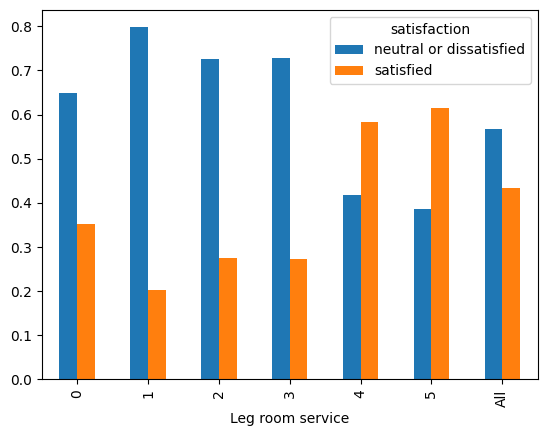

In [101]:
#Leg room service
cross = pd.crosstab(raw_df['Leg room service'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Baggage handing：手荷物の取り扱い

satisfaction,neutral or dissatisfied,satisfied
Baggage handling,,
1,0.702363,0.297637
2,0.704540,0.295460
3,0.764153,0.235847
4,0.519086,0.480914
5,0.387306,0.612694
All,0.566667,0.433333


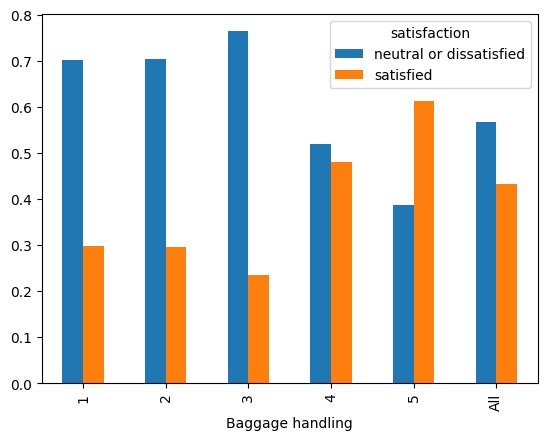

In [102]:
#Baggage handling
cross = pd.crosstab(raw_df['Baggage handling'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Chekin service：チェックインサービス

satisfaction,neutral or dissatisfied,satisfied
Checkin service,,
0,1.000000,0.000000
1,0.760745,0.239255
2,0.747693,0.252307
3,0.551712,0.448288
4,0.540079,0.459921
5,0.390223,0.609777
All,0.566667,0.433333


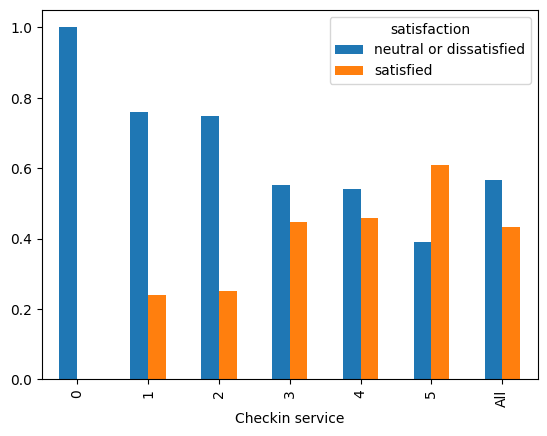

In [103]:
#Checkin service
cross = pd.crosstab(raw_df['Checkin service'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Inflight service：機内サービス

satisfaction,neutral or dissatisfied,satisfied
Inflight service,,
0,1.000000,0.000000
1,0.710051,0.289949
2,0.698787,0.301213
3,0.761023,0.238977
4,0.522230,0.477770
5,0.390028,0.609972
All,0.566667,0.433333


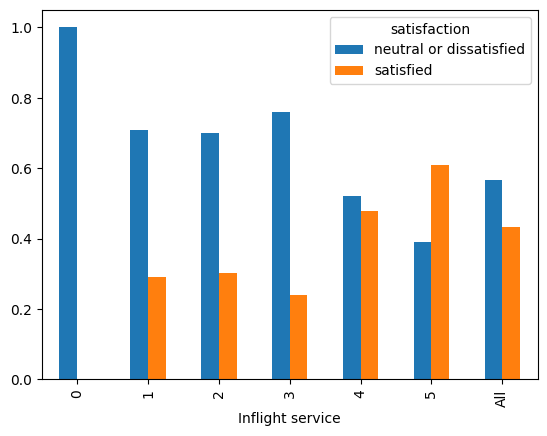

In [104]:
#Inflight service
cross = pd.crosstab(raw_df['Inflight service'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Cleanliness：清潔さ

satisfaction,neutral or dissatisfied,satisfied
Cleanliness,,
0,1.000000,0.000000
1,0.803799,0.196201
2,0.787007,0.212993
3,0.568121,0.431879
4,0.464660,0.535340
5,0.391203,0.608797
All,0.566667,0.433333


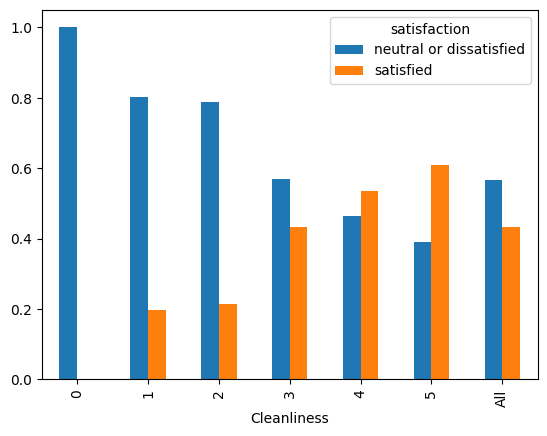

In [105]:
#Cleanliness
cross = pd.crosstab(raw_df['Cleanliness'], raw_df['satisfaction'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

### Depature Delay in Minutes：出発遅延(分)

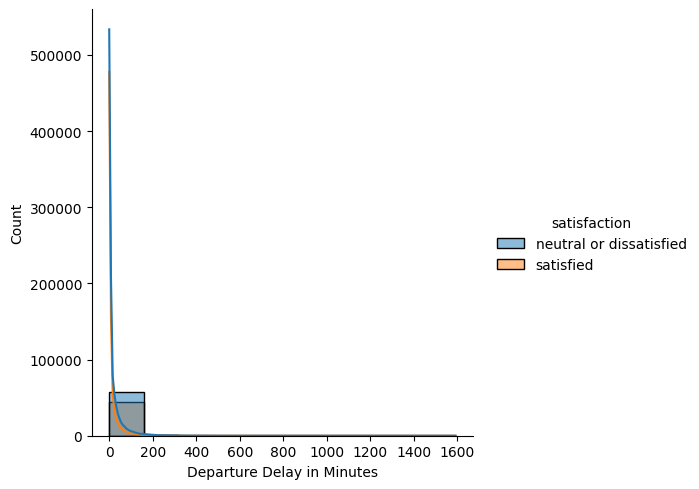

In [109]:
#Departure Delay in Minutes
sns.displot(data=raw_df, x="Departure Delay in Minutes", hue="satisfaction", kde=True, bins=10)
plt.show()

### 到着遅延(分)

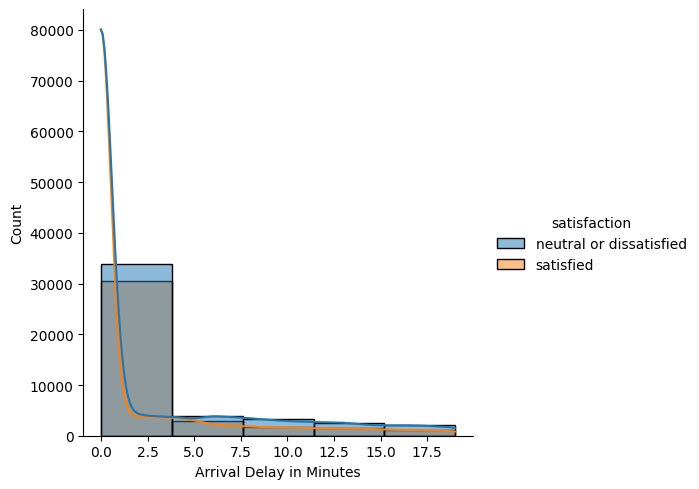

In [126]:
#Arrival Delay in Minutes
sns.displot(data=raw_df.query('`Arrival Delay in Minutes` < 20'), x="Arrival Delay in Minutes", hue="satisfaction", kde=True, bins=5)
plt.show()

In [122]:
raw_df.query('`Arrival Delay in Minutes` > 1000')

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
6744,6744,69661,Male,Loyal Customer,32,Business travel,Business,2916,2,2,...,3,4,5,4,5,3,5,1305,1280.0,satisfied
61310,61310,4903,Male,Loyal Customer,49,Business travel,Business,1959,1,1,...,4,4,4,5,4,4,4,1017,1011.0,satisfied
83741,83741,73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,...,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


In [90]:
raw_df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

## Class毎にt-SNEを使用する際のデータ加工

In [135]:
df_busi = raw_df.query('Class == "Business"').dropna()
df_busi

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103894,103894,86549,Male,Loyal Customer,26,Business travel,Business,712,4,4,...,5,3,4,4,3,4,5,17,26.0,satisfied
103897,103897,102203,Female,Loyal Customer,60,Business travel,Business,1599,5,5,...,4,4,4,4,4,4,4,9,7.0,satisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied


In [136]:
df_busi_tSNE = df_busi.drop(['Unnamed: 0','id','Class','satisfaction'], axis=1)
df_busi_tSNE

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
1,Male,disloyal Customer,25,Business travel,235,3,2,3,3,1,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,1142,2,2,2,2,5,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,562,2,5,5,5,2,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,214,3,3,3,3,4,...,5,3,3,4,4,3,3,3,0,0.0
7,Female,Loyal Customer,52,Business travel,2035,4,3,4,4,5,...,5,5,5,5,5,4,5,4,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103894,Male,Loyal Customer,26,Business travel,712,4,4,4,4,5,...,5,5,3,4,4,3,4,5,17,26.0
103897,Female,Loyal Customer,60,Business travel,1599,5,5,5,5,5,...,4,4,4,4,4,4,4,4,9,7.0
103900,Male,Loyal Customer,49,Business travel,2347,4,4,4,4,2,...,5,5,5,5,5,5,5,4,0,0.0
103901,Male,disloyal Customer,30,Business travel,1995,1,1,1,3,4,...,5,4,3,2,4,5,5,4,7,14.0


In [137]:
df_busi_tSNE_onehot = pd.get_dummies(df_busi_tSNE, drop_first=True, dtype="int")
df_busi_tSNE_onehot

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
1,25,235,3,2,3,3,1,3,1,1,...,5,3,1,4,1,1,6.0,1,1,0
2,26,1142,2,2,2,2,5,5,5,5,...,3,4,4,4,5,0,0.0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,5,3,1,4,2,11,9.0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,4,4,3,3,3,0,0.0,1,0,0
7,52,2035,4,3,4,4,5,5,5,5,...,5,5,4,5,4,4,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103894,26,712,4,4,4,4,5,5,5,5,...,4,4,3,4,5,17,26.0,1,0,0
103897,60,1599,5,5,5,5,5,5,4,4,...,4,4,4,4,4,9,7.0,0,0,0
103900,49,2347,4,4,4,4,2,4,5,5,...,5,5,5,5,4,0,0.0,1,0,0
103901,30,1995,1,1,1,3,4,1,5,4,...,2,4,5,5,4,7,14.0,1,1,0
